In [1]:
from LightMEF import LightMEF

In [2]:
analysis = LightMEF("Region_US48.xlsx")
data = analysis.load_and_clean_data(start_date='2019-01-01', end_date='2025-12-31')

📂 Loading data...
✅ Data loaded: 61368 observations from 2019-01-01 to 2025-12-31


In [3]:
# 3. Create Time Features
analysis.create_time_variables()

🕐 Creating time variables (Season, Month, Day)...
✅ Time variables created


,Region,UTC time,Local date,Local_Hour,Local time,Time zone,Demand forecast,D,NG,Total interchange,...,hourly_emissions_mlb,hourly_generation_mkwh,hourly_generation_renewables_mkwh,hourly_generation_nonrenewables_mkwh,T,month,year,day,season,trend
30715,US48,2019-01-01 00:00:00,2018-12-31,19,2018-12-31 19:00:00,Eastern,474754,461392.0,443760.0,-1706.0,...,364.694790,442.471,202.493,239.978,1,1,2019,Tuesday,Winter,1
30716,US48,2019-01-01 01:00:00,2018-12-31,20,2018-12-31 20:00:00,Eastern,477012,459577.0,443439.0,-2413.0,...,361.547177,442.123,203.516,238.607,2,1,2019,Tuesday,Winter,2
30717,US48,2019-01-01 02:00:00,2018-12-31,21,2018-12-31 21:00:00,Eastern,472897,451601.0,433541.0,-2375.0,...,346.303369,432.412,203.985,228.427,3,1,2019,Tuesday,Winter,3
30718,US48,2019-01-01 03:00:00,2018-12-31,22,2018-12-31 22:00:00,Eastern,459428,437803.0,419382.0,-816.0,...,327.104588,418.225,203.813,214.412,4,1,2019,Tuesday,Winter,4
30719,US48,2019-01-01 04:00:00,2018-12-31,23,2018-12-31 23:00:00,Eastern,439314,422742.0,406525.0,-1224.0,...,311.432415,405.489,203.129,202.360,5,1,2019,Tuesday,Winter,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92078,US48,2025-12-31 19:00:00,2025-12-31,14,2025-12-31 14:00:00,Eastern,506723,507946.0,505349.0,-3218.0,...,375.250294,504.684,239.645,264.521,61364,12,2025,Wednesday,Winter,61364
92079,US48,2025-12-31 20:00:00,2025-12-31,15,2025-12-31 15:00:00,Eastern,501646,502367.0,499280.0,-2665.0,...,362.819728,499.150,240.544,257.964,61365,12,2025,Wednesday,Winter,61365
92080,US48,2025-12-31 21:00:00,2025-12-31,16,2025-12-31 16:00:00,Eastern,502500,498110.0,494410.0,-3748.0,...,357.368942,494.459,236.810,256.655,61366,12,2025,Wednesday,Winter,61366
92081,US48,2025-12-31 22:00:00,2025-12-31,17,2025-12-31 17:00:00,Eastern,510873,503223.0,498332.0,-4100.0,...,367.588036,497.863,230.274,266.654,61367,12,2025,Wednesday,Winter,61367


In [4]:
# 4. Detrend (Dummy Variable Method)
data = analysis.dummy_variable_seasonality_extraction()


🔧 Extracting seasonality using Dummy Variables...
   -> Fitting OLS for Emissions...
                             OLS Regression Results                             
Dep. Variable:     hourly_emissions_mlb   R-squared:                       0.809
Model:                              OLS   Adj. R-squared:                  0.808
Method:                   Least Squares   F-statistic:                     707.8
Date:                  Tue, 03 Feb 2026   Prob (F-statistic):               0.00
Time:                          16:40:43   Log-Likelihood:            -3.1268e+05
No. Observations:                 61368   AIC:                         6.261e+05
Df Residuals:                     61001   BIC:                         6.294e+05
Df Model:                           366                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---

In [5]:
#analysis.test_optimal_selection()

In [6]:
#analysis.freq_state()

In [7]:
# 5. Fit Model & Assign Regimes
ms_results = analysis.fit_msm_full_series()
ms_data = analysis.assign_regimes_to_data()


🔄 Fitting Markov Switching Model...
[ 9.93703158e-01  1.88244827e-02  5.38606505e-03  1.34428937e-02
 -4.37810271e-03  2.88984379e-04  8.88093692e-01  1.01726394e+00
  1.45876320e-03  9.81674797e-01  9.63622793e-01]
✅ MSM Fitted. High MEF Regime is: 1
                         Markov Switching Model Results                         
Dep. Variable:                        y   No. Observations:                61367
Model:             MarkovAutoregression   Log Likelihood              111455.337
Date:                  Tue, 03 Feb 2026   AIC                        -222888.673
Time:                          16:43:15   BIC                        -222789.402
Sample:                               0   HQIC                       -222857.870
                                - 61367                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coe

In [8]:
# import statsmodels.api as sm
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# import pandas as pd
# y =data['hourly_emissions_detrended']
# x = data['hourly_generation_nonrenewables_detrended']
# # Scale variables
# scaler_y = StandardScaler()
# scaler_x = StandardScaler()
# y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()
# x_scaled = scaler_x.fit_transform(x.values.reshape(-1, 1)).flatten()
# mod = sm.tsa.MarkovAutoregression(
#             endog=y_scaled,
#             exog=x_scaled,
#             k_regimes=3,
#             order=1,
#             trend='c',
#             switching_trend=True,
#             switching_exog=True,
#             switching_variance=False
#         )
# res = mod.fit()
# print(res.summary())
# print(dir(res))
# p=res.params
# print(p[4],p[5])
# h_prob = res.smoothed_marginal_probabilities


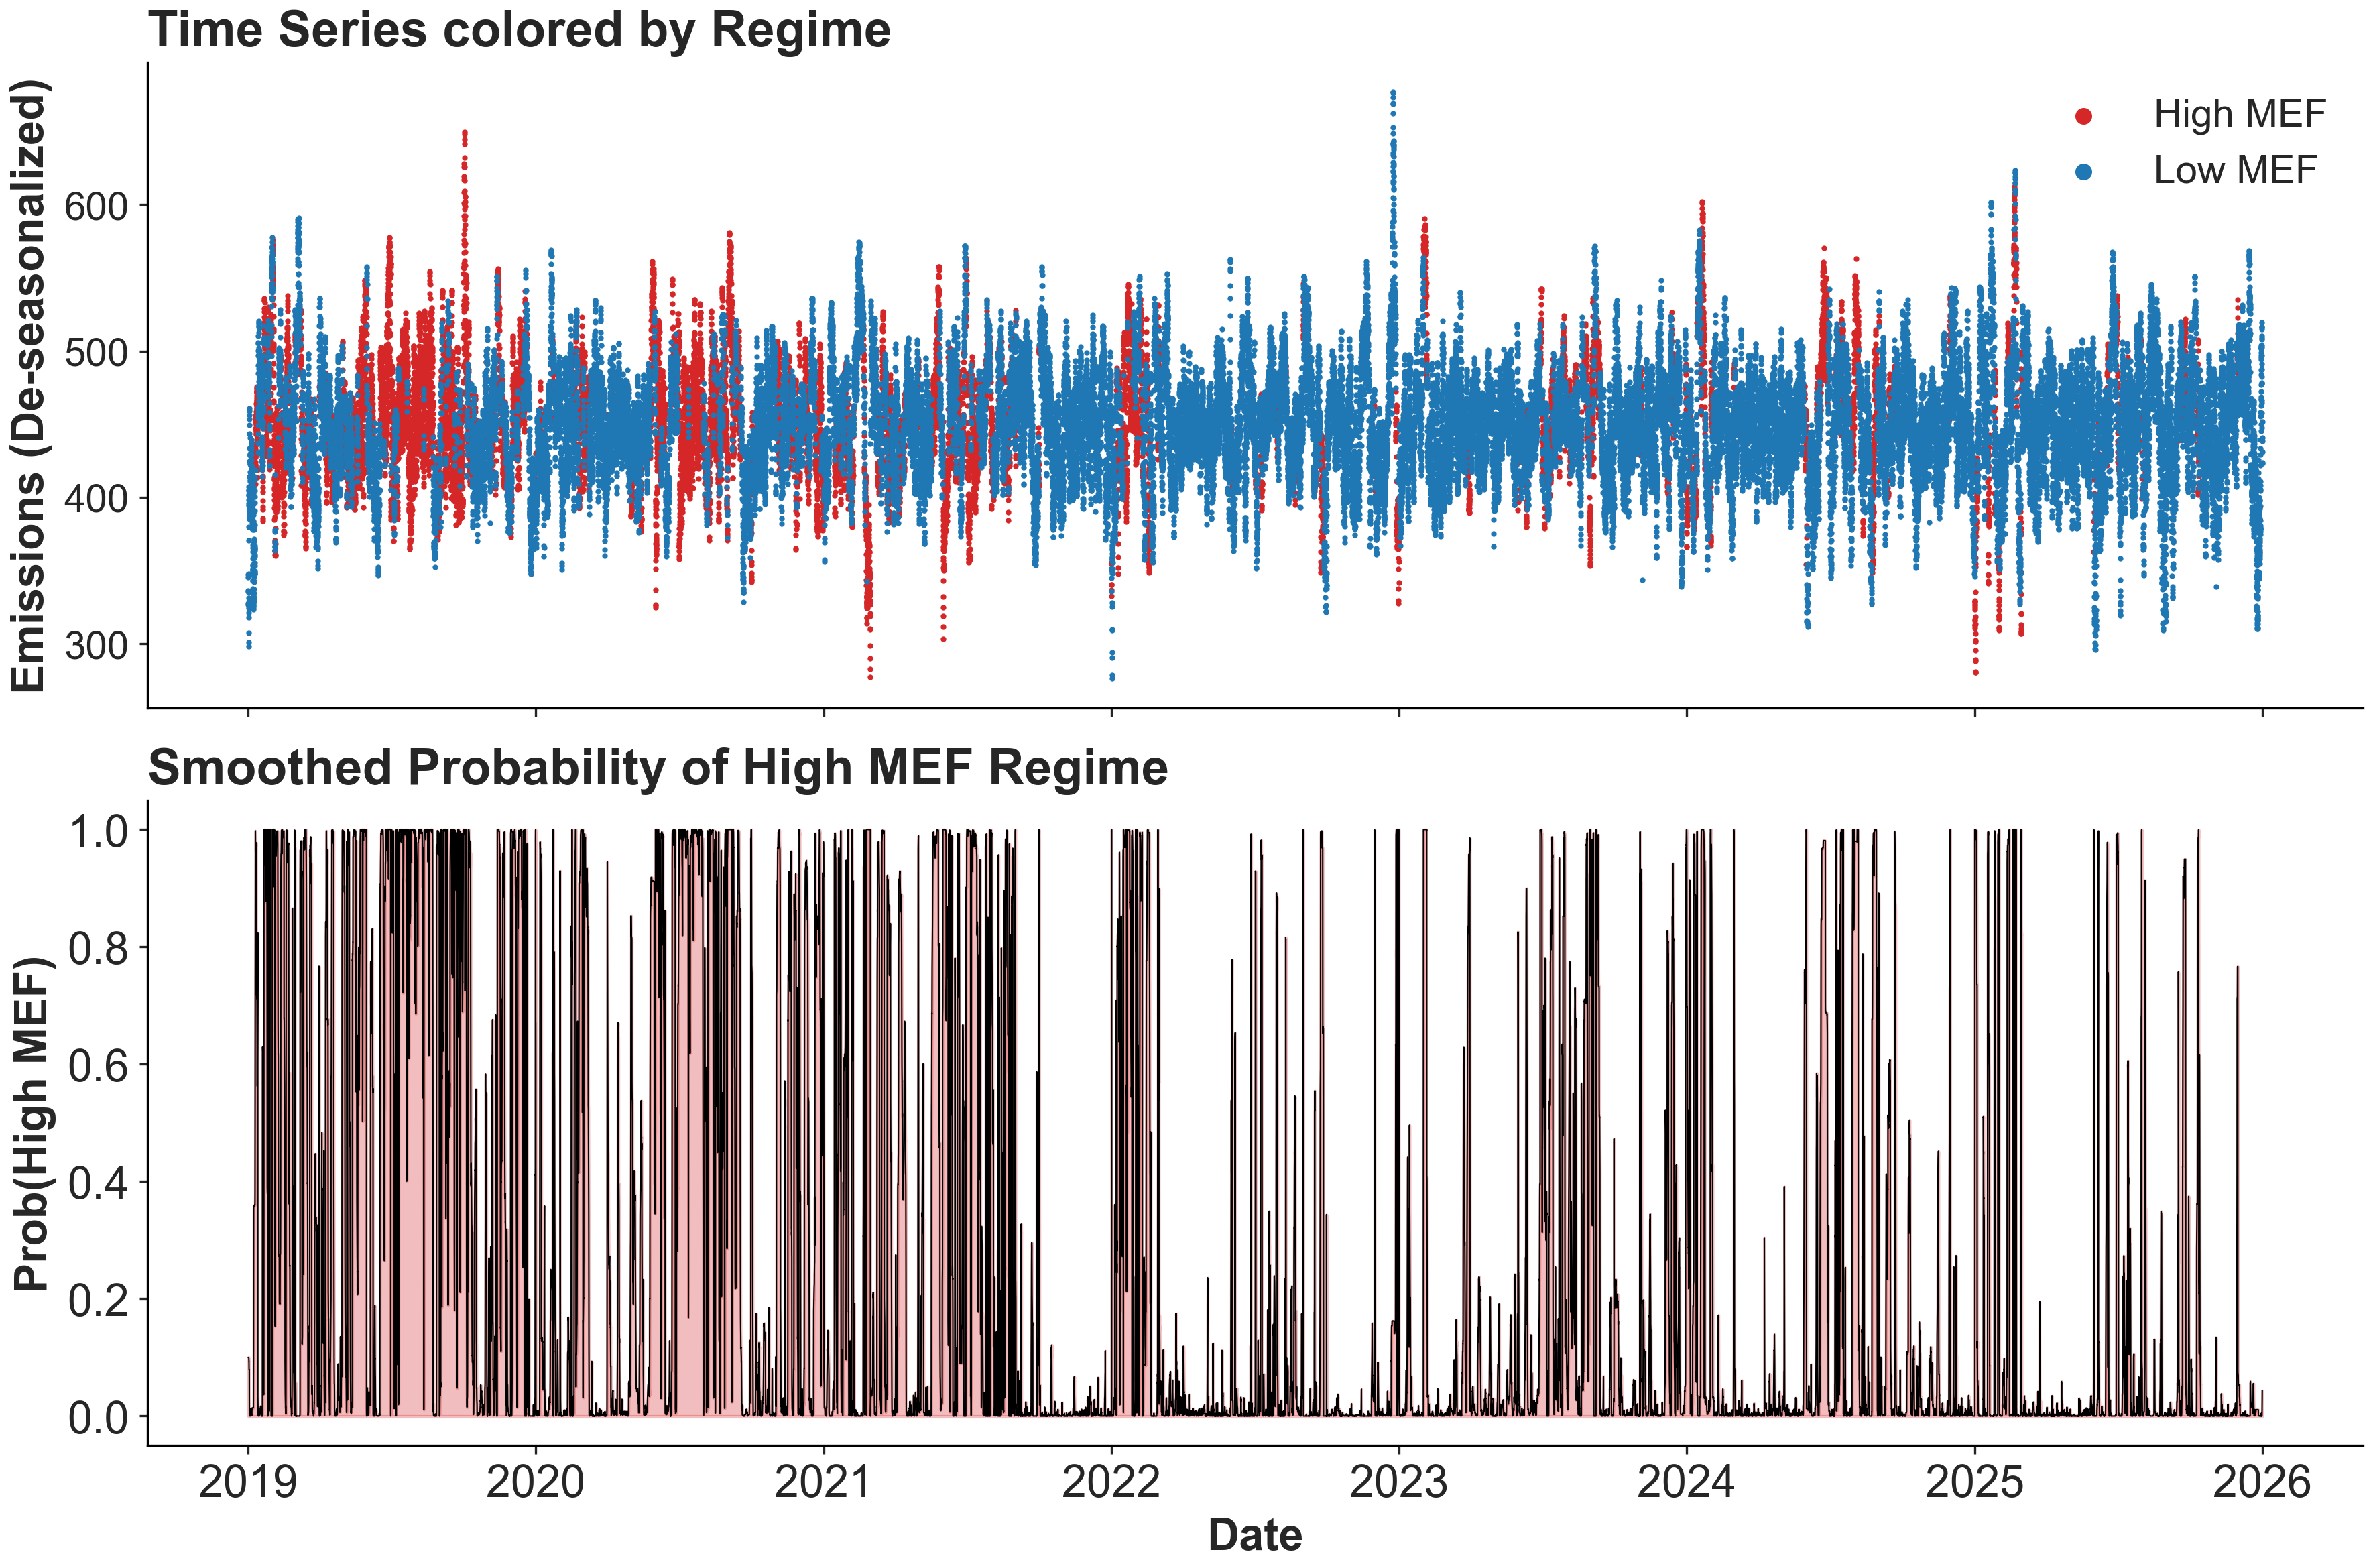

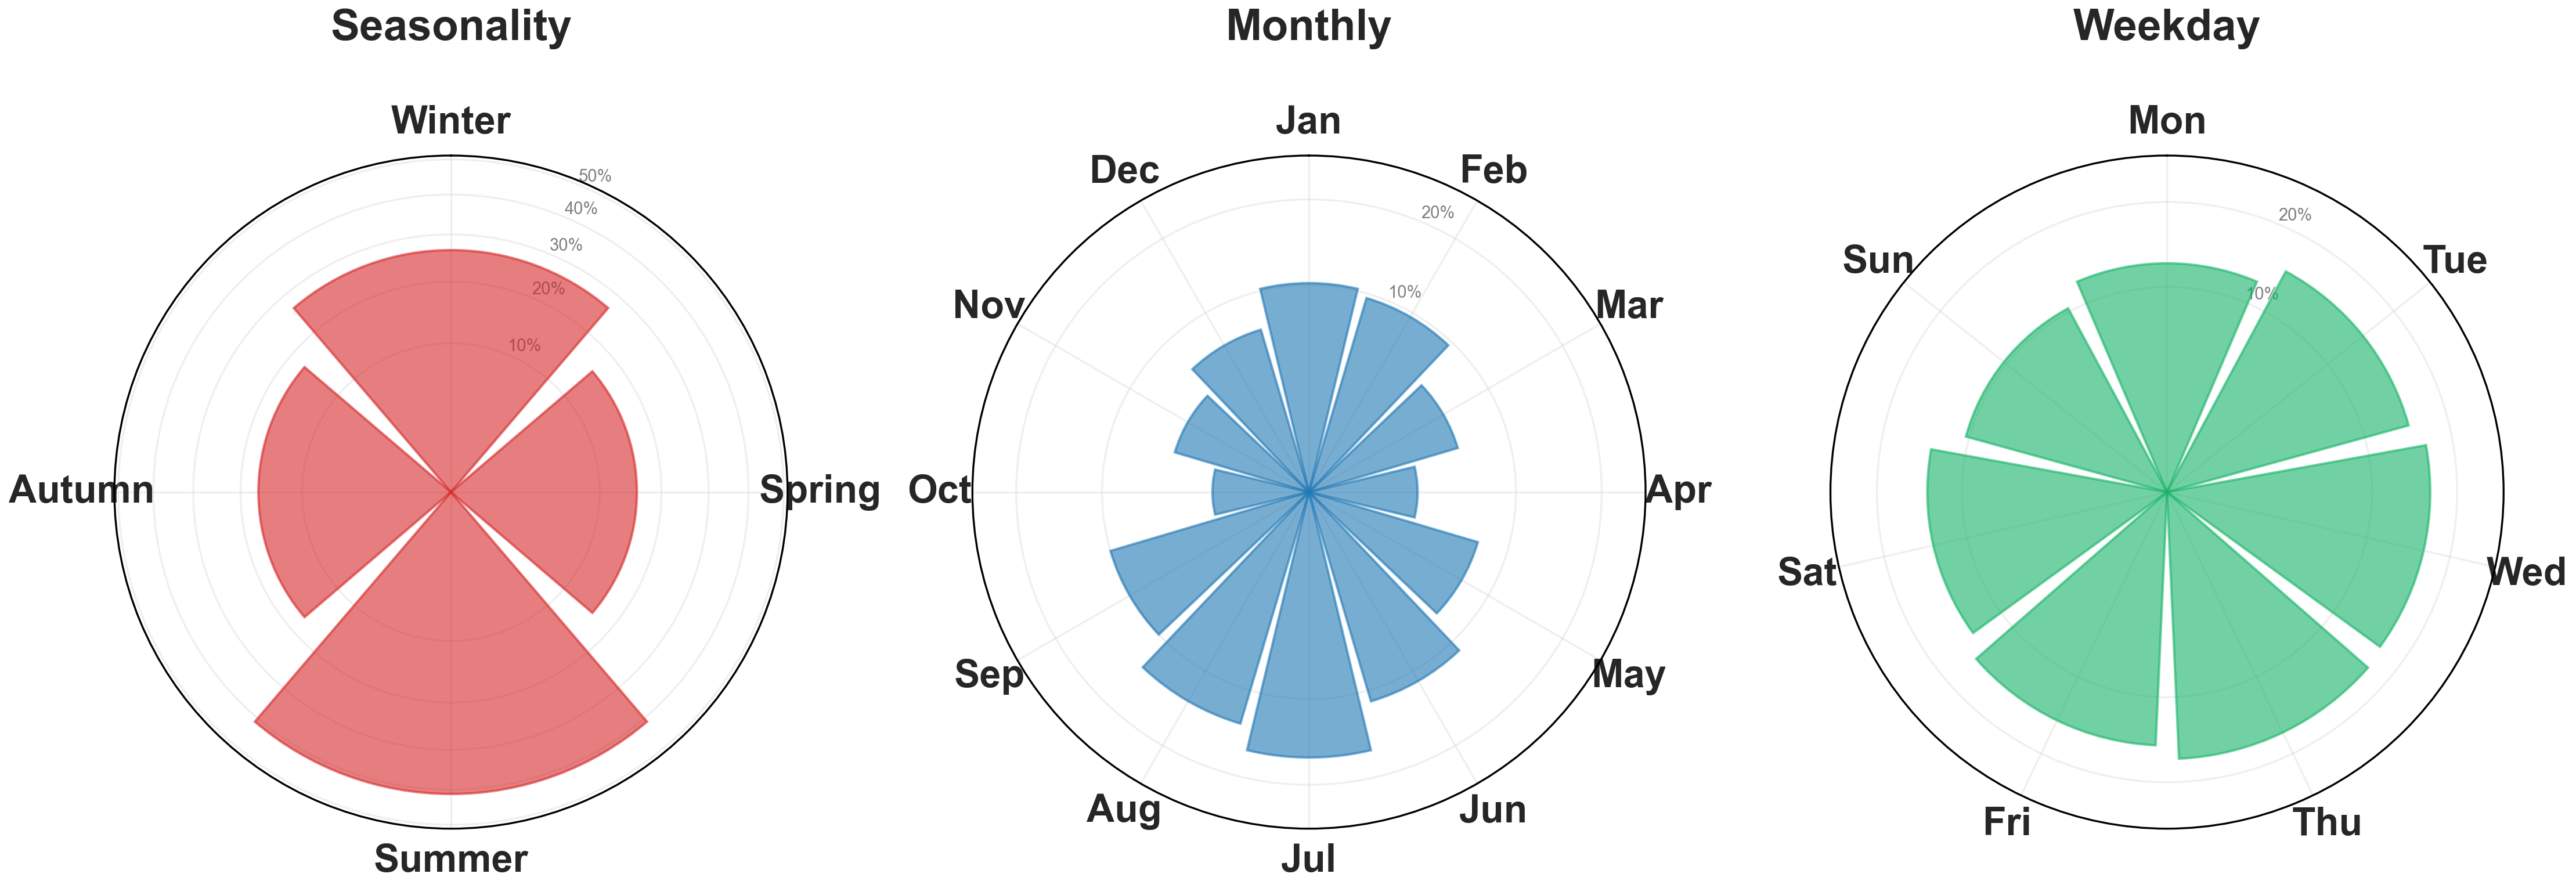

In [9]:
# 6. Plots
#analysis.plot_time_series_comparison()
analysis.plot_regime_time_series()
analysis.plot_regime_polar_charts()


📈 MARGINAL FUEL PROBABILITY ANALYSIS (Slope of Gen vs Load)
------------------------------------------------------------
          Coal_Beta   Coal_R2  Gas_Beta    Gas_R2
Regime                                           
Low MEF    0.187607  0.730979  0.521758  0.787244
High MEF   0.244768  0.815963  0.514303  0.895843
------------------------------------------------------------


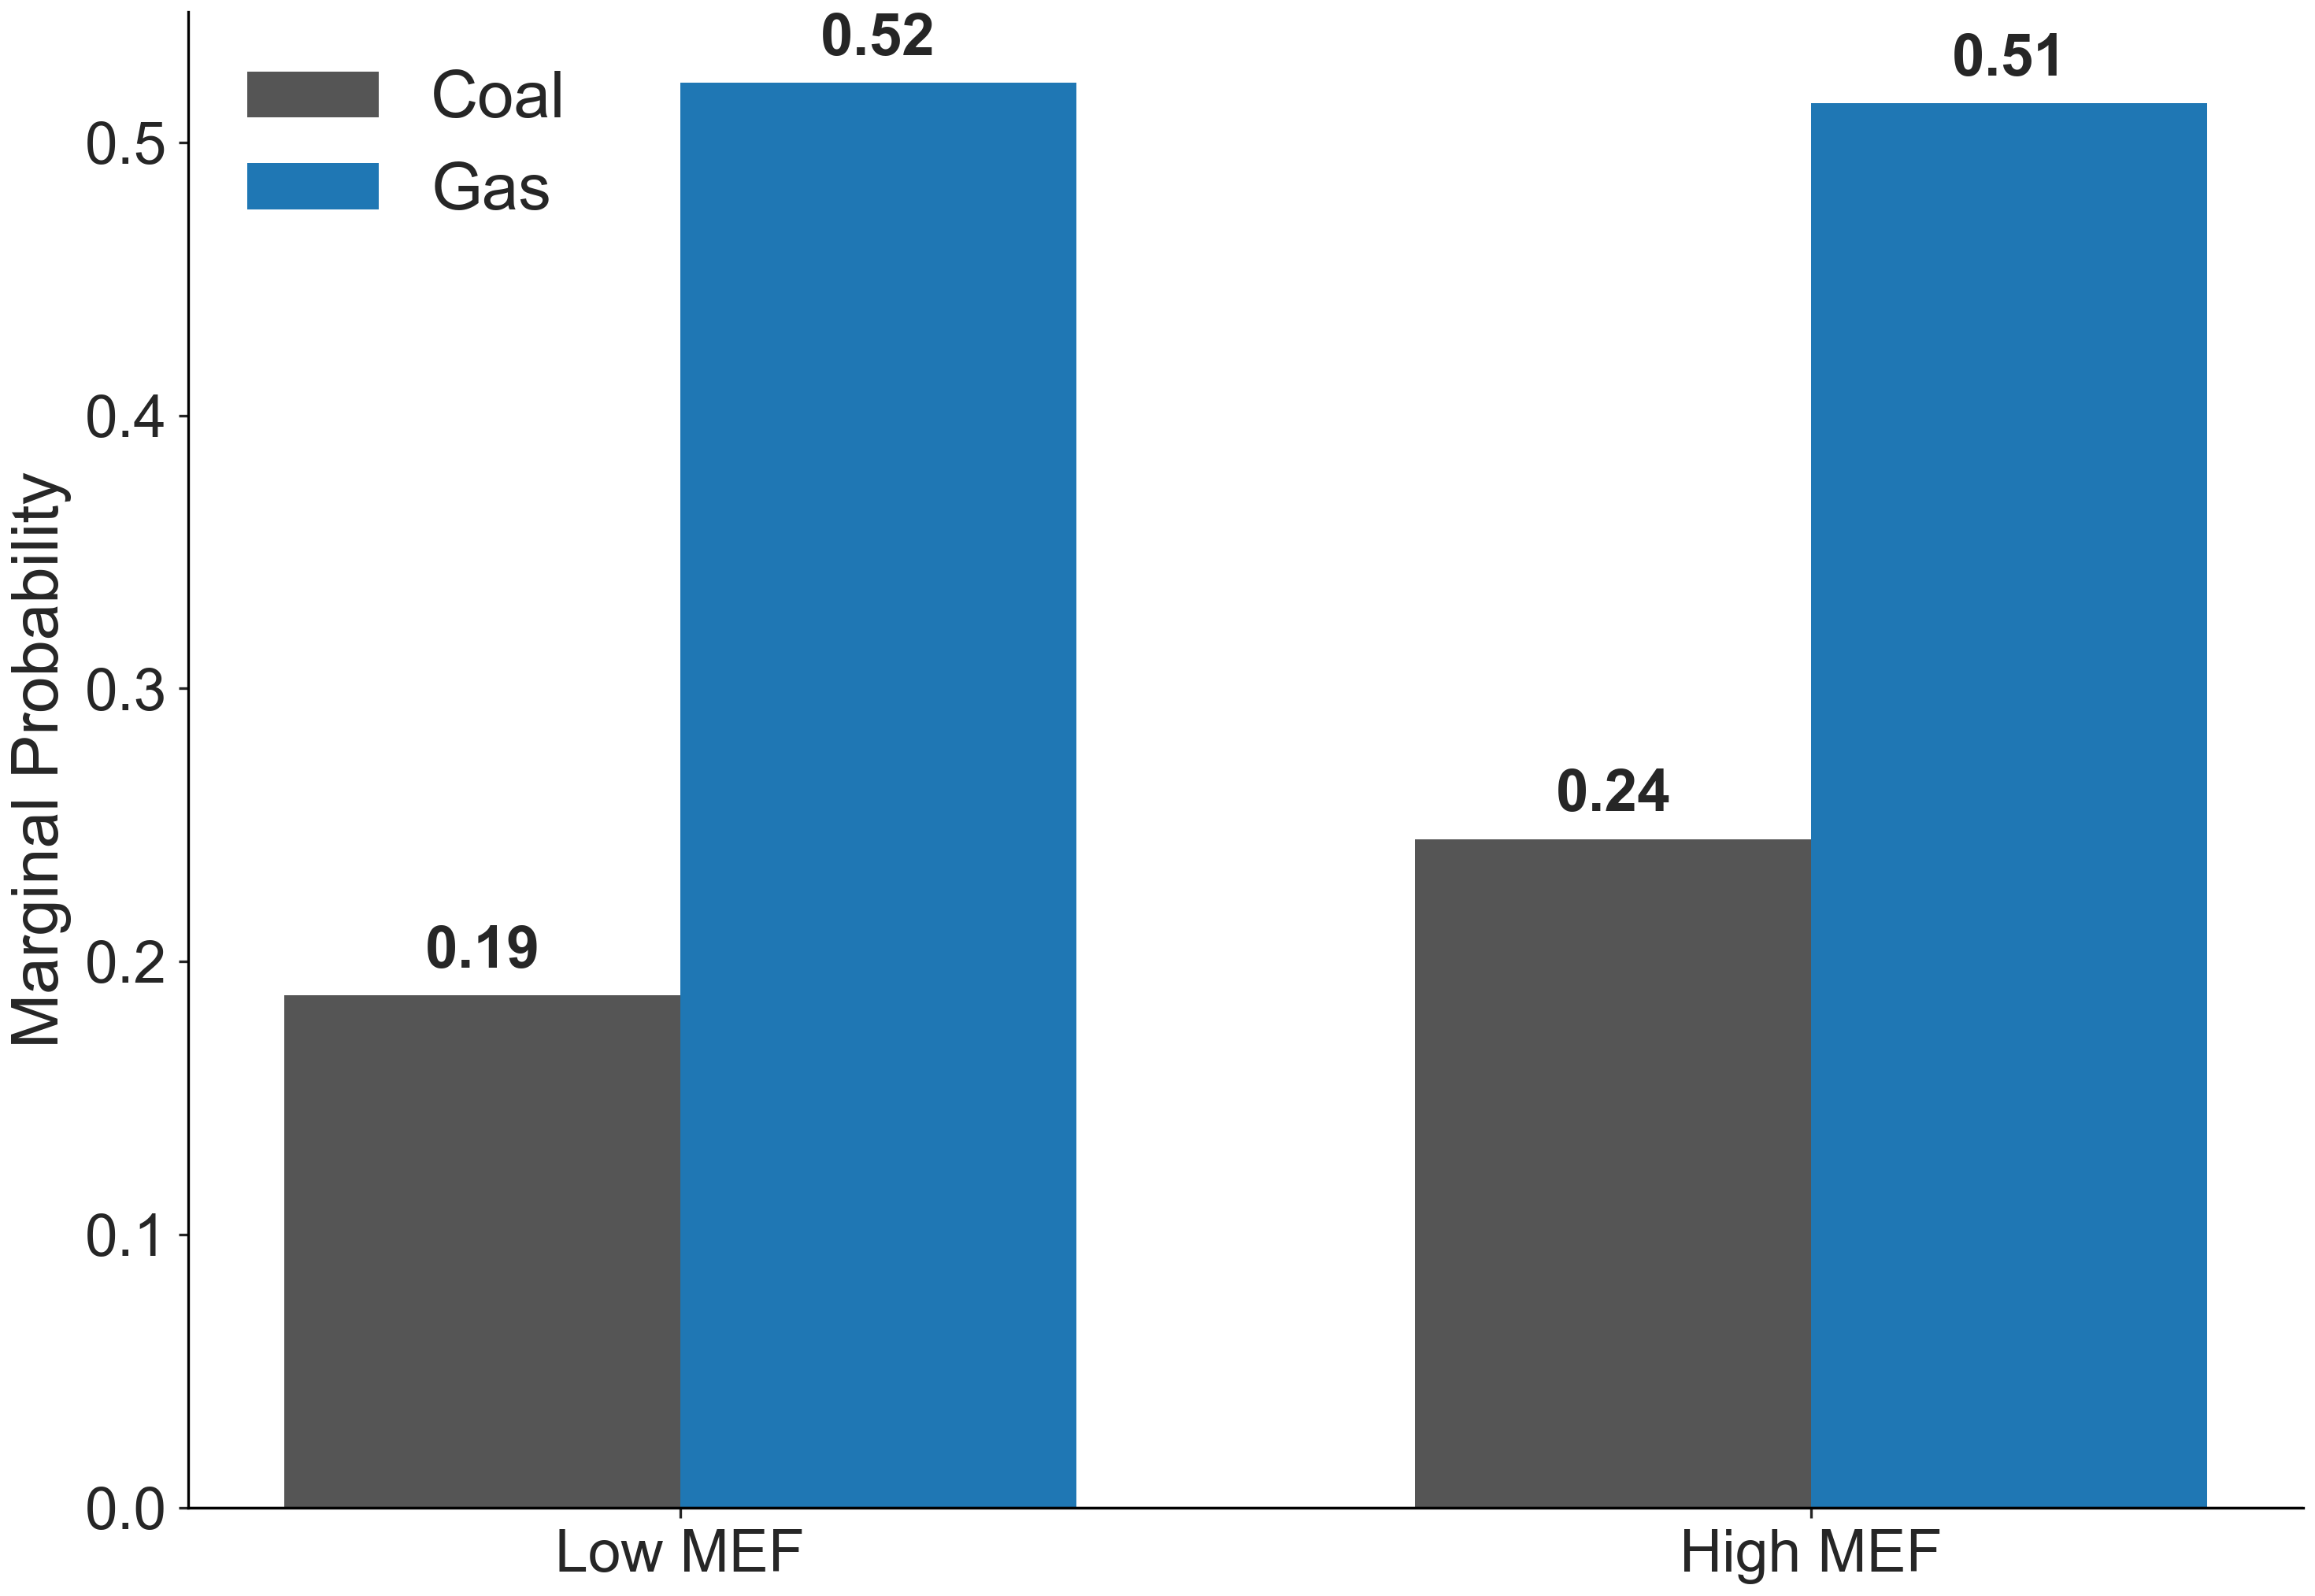

In [10]:
analysis.analyze_marginal_fuel_probability()

In [11]:
ms_results_hourly = analysis.fit_msm_hourly()


🔄 Fitting Markov Switching Model...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done  14 out of  48 | elapsed:   30.2s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  19 out of  48 | elapsed:   33.4s remaining:   51.1s
[Parallel(n_jobs=-1)]: Done  24 out of  48 | elapsed:   37.7s remaining:   37.7s
[Parallel(n_jobs=-1)]: Done  29 out of  48 | elapsed:   39.3s remaining:   25.7s
[Parallel(n_jobs=-1)]: Done  34 out of  48 | elapsed:   42.0s remaining:   17.2s
[Parallel(n_jobs=-1)]: Done  39 out of  48 | elapsed:   46.9s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  44 out of  48 | elapsed:   47.6s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   49.4s finished


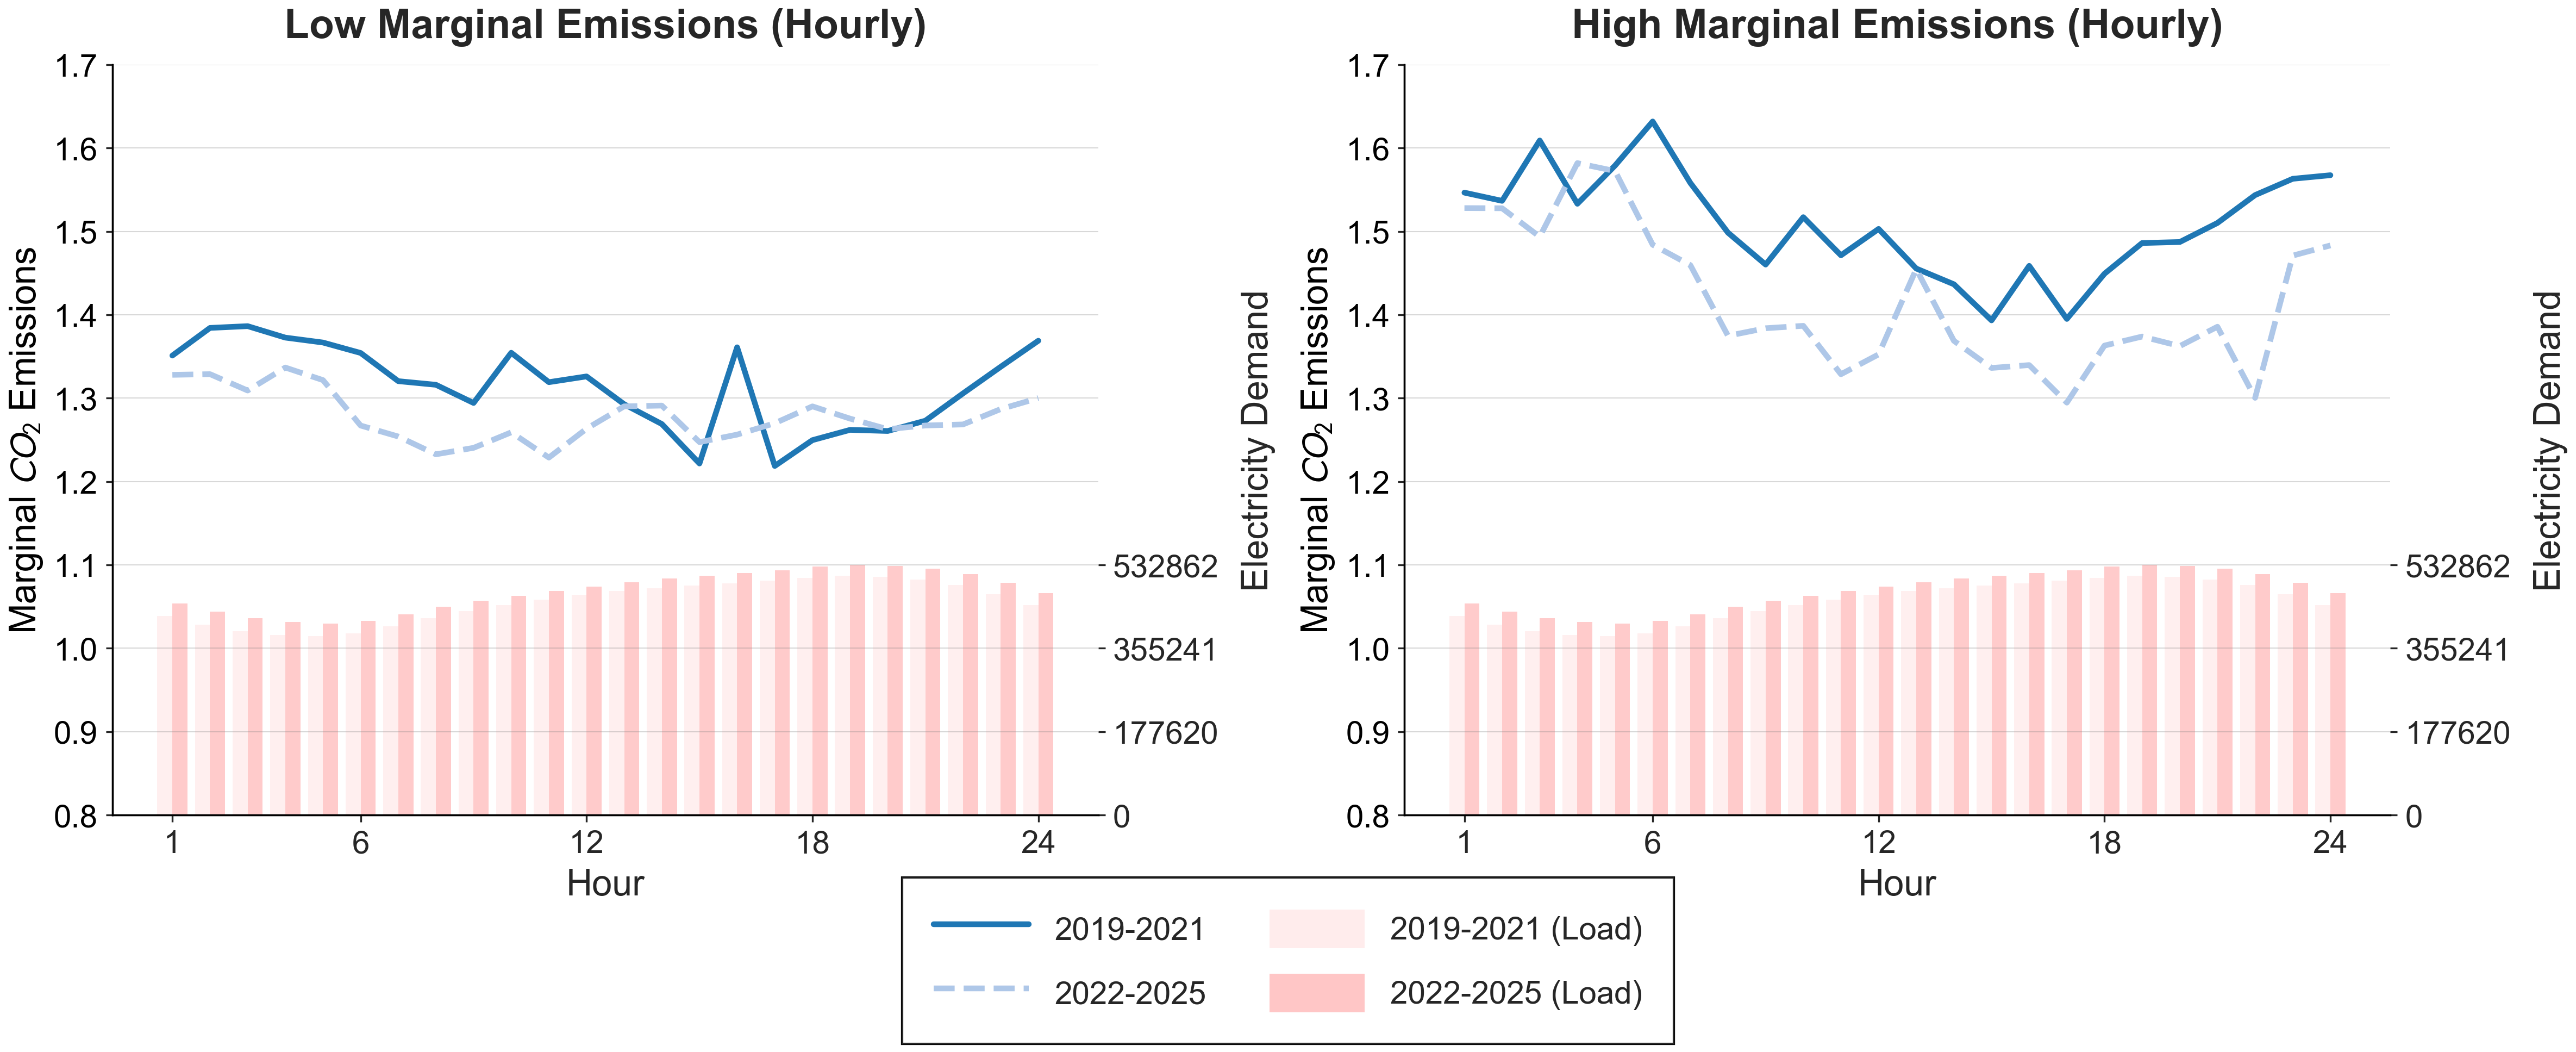

In [12]:
analysis.plot_mef_analysis_hourly(ms_results_hourly)